# Practical Application III: Comparing Classifiers

**Overview** 

In this practical application, the goal is to compare the performance of the classifiers we encountered in this section based on the following criteria:

* Clear identification of evaluation metrics
* Appropriate interpretation of evaluation metrics
* Clear rationale for use of the evaluation metrics
* Appropriate comparison of the four models

The four classifier models to use in this practical application are the following: 
* K Nearest Neighbor
* Logistic Regression
* Decision Trees
* Support Vector Machines.  


We will utilize a dataset related to marketing bank products over the telephone.  




### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



# Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The dataset collected is related to 17 campaings that occurred between May 2008 and November 2010, corresponding to a total of 79354 contacts.

## Read in the Data
Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [851]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

#### Library Imports

In [1012]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

from numpy import arange
from pandas import read_csv
from scipy.stats import chi2_contingency
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.decomposition import PCA
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel, RFE
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression, LinearRegression , Lasso, Ridge
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler, OrdinalEncoder, PolynomialFeatures

#### Data Exploration

In [853]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [854]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [855]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [856]:
# What is the shape of our dataset (rows, columns)
df.shape

(41188, 21)

In [857]:
# Any obvious numerical correlations?
df.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


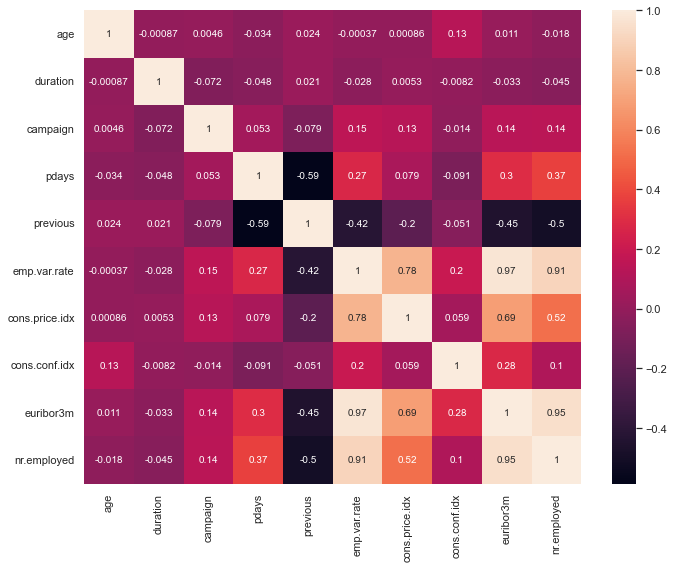

In [858]:
# Let's visualize the correlations with a heatmap.
# This helps us eliminate any features that may not help with prediction.
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)
plt.tight_layout()

**OBSERVATION:** Of all the correlations presented in the heatmpa the euribor3m being strongly correlated (almost perfectly colinear) with emp.var.rate (.97) and nr.employed (.95), it's a great candidate for removal from the further analysis.

In [859]:
# Does the dataset have missing or problematic data?
df.isna().sum().sort_values(ascending=False)

age               0
campaign          0
nr.employed       0
euribor3m         0
cons.conf.idx     0
cons.price.idx    0
emp.var.rate      0
poutcome          0
previous          0
pdays             0
duration          0
job               0
day_of_week       0
month             0
contact           0
loan              0
housing           0
default           0
education         0
marital           0
y                 0
dtype: int64

In [860]:
# Percentage of missing values per column.
missing_values = df.isnull().mean()*100
missing_values.sum()

0.0

**OBSERVATION:** No missing values

In [861]:
# What are the counts of unique values per column?
df.nunique(axis=0).sort_values(ascending=False)

duration          1544
euribor3m          316
age                 78
campaign            42
pdays               27
cons.conf.idx       26
cons.price.idx      26
job                 12
nr.employed         11
month               10
emp.var.rate        10
previous             8
education            8
day_of_week          5
marital              4
default              3
poutcome             3
loan                 3
housing              3
contact              2
y                    2
dtype: int64

The dataset contains both categorical and numeric columns. Let's explore the data starting with the categorical features first.

### Categorical Data

In [862]:
df.select_dtypes(include=['object']).columns.tolist()

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

**OBSERVATION:** The "day_of_week" can be converted to an int and the target var (or deposit) can become a binary number.

In [863]:
# Numerical cols
num_cols = df._get_numeric_data().columns
num_cols

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [864]:
# Check the unique values for each categorical feature
for f in df.select_dtypes(include=['object']).columns.tolist():
    print(f'\033[1m Feature: {f} \033[0m')
    print(df[f].unique())

 Feature: job 
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
 Feature: marital 
['married' 'single' 'divorced' 'unknown']
 Feature: education 
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
 Feature: default 
['no' 'unknown' 'yes']
 Feature: housing 
['no' 'yes' 'unknown']
 Feature: loan 
['no' 'yes' 'unknown']
 Feature: contact 
['telephone' 'cellular']
 Feature: month 
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
 Feature: day_of_week 
['mon' 'tue' 'wed' 'thu' 'fri']
 Feature: poutcome 
['nonexistent' 'failure' 'success']
 Feature: y 
['no' 'yes']


##  Understanding Features, Cleaning and Visualising the Data.

###  Helper functions
Adding some functions to facilitate code reuse and shorter notebook. :)

In [865]:
def plot_distributions(cols, gtitle):
    """Plots the target column and sets the desired title."""
    plt.figure(figsize=(8,8));
    cols.plot(kind="bar").set_title(gtitle);

def plot_dist_sns(feature, gtitle):
    """Uses SNS to plot distribution of value counts."""
    fig, ax = plt.subplots(figsize=(14,8))
    colscount = feature.value_counts()
    count_plot_by_type=sns.barplot(x=colscount.index, y=colscount.values, ax=ax)
    count_plot_by_type.set(title=gtitle)
    # Label the the bars with the appropriate count
    for c in count_plot_by_type.containers:
        count_plot_by_type.bar_label(c)
    
def count_values(feature):
    totals = feature.value_counts()
    print(totals)
    return totals

def calc_significance(df):
    # Per Python-pearsons-chi-squre definition.
    # H0 (Null Hypothesis) = no relation between variables.
    # The alternate is that there is a signficant relation between the two.
    stat, p, dof, expected = chi2_contingency(housing_deposit_df)

    alpha = 0.05 # Standard default
    print("p value is " + str(p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (H0 holds true)')
  
# Calculate information value
# Source: https://www.kaggle.com/code/podsyp/information-value-iv-weight-of-evidence-woe/notebook
def calc_iv(df, feature, target, pr=0):

    lst = []

    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append([feature, val, df[df[feature] == val].count()[feature], df[(df[feature] == val) & (df[target] == 1)].count()[feature]])

    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Bad'])
    data = data[data['Bad'] > 0]

    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])
    data['IV'] = (data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])).sum()

    data = data.sort_values(by=['Variable', 'Value'], ascending=True)

    if pr == 1:
        print(data)

    return data['IV'].values[0]

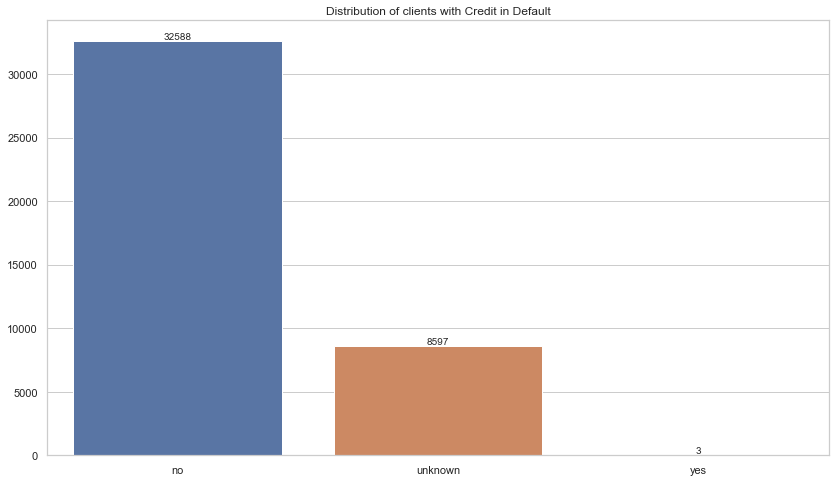

In [866]:
# How many clients contacted have credit in default status?
plot_dist_sns(df['default'], "Distribution of clients with Credit in Default")

**OBSERVATION:** There is no differentiation on this variable. All observations except for 3 belong to groups "no" (the majority) and "unknown". This variable doesn't seem to add much value to the analysis and so removing seems logical.

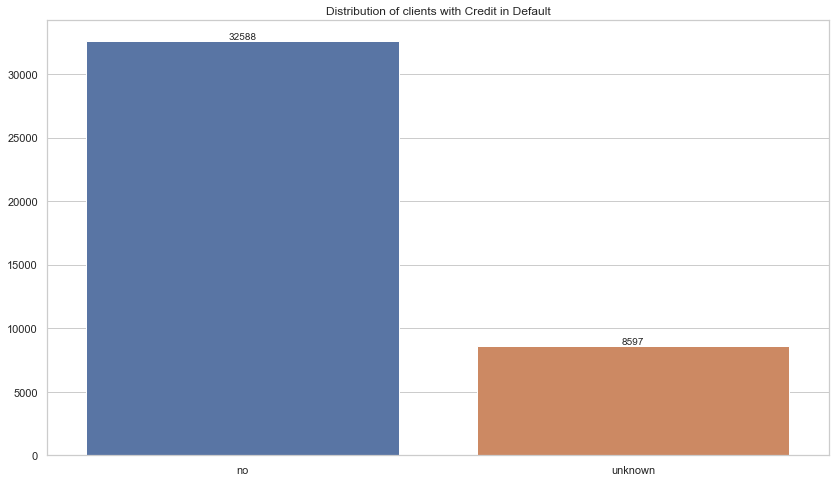

In [867]:
# The data dataframe will contain the modifications.
data = df[df['default'] != 'yes']
plot_dist_sns(data['default'], "Distribution of clients with Credit in Default")

## Age

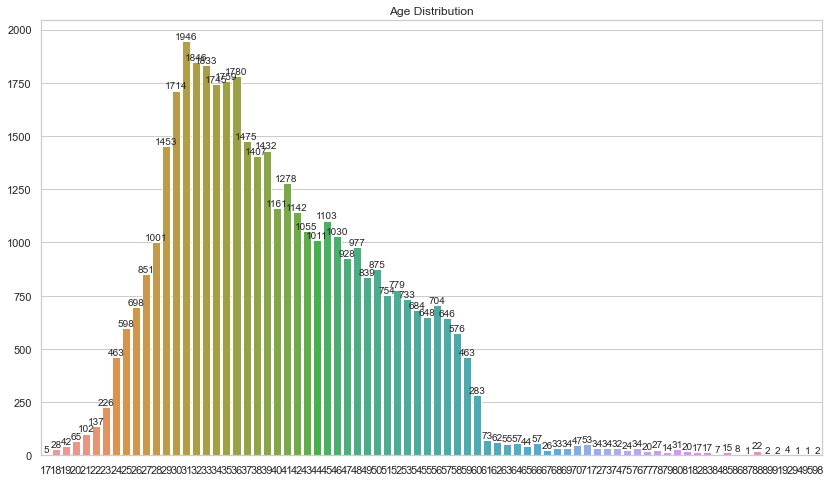

In [868]:
plot_dist_sns(data['age'], "Age Distribution")

 **OBSERVATION:** This visual just shows something clear, the data can be broken up into three groups: young (<= 30), middle (> 30) and senior (>60). 
 
 ***Q: Who of the three groups is more willing to take a term deposit?***
 Per the data the minimum age seems to be 17, with a max of 98 and an average of 40.

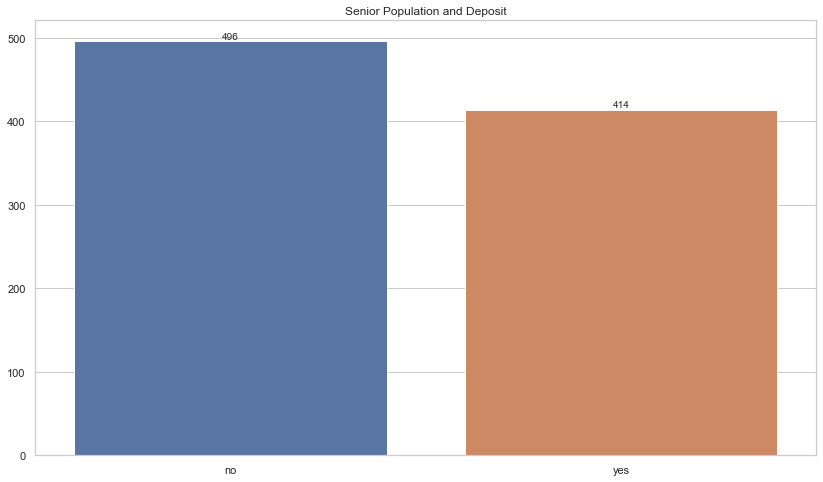

In [869]:
df_senior=data[data['age'] > 60]['y']
plot_dist_sns(df_senior, "Senior Population and Deposit")

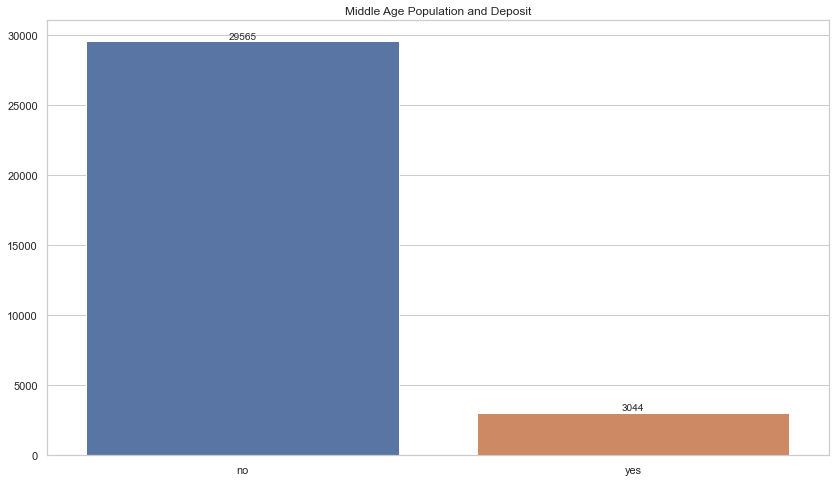

In [870]:
df_senior=data[(data['age'] > 30) & (data['age'] < 60)]['y']
plot_dist_sns(df_senior, "Middle Age Population and Deposit")

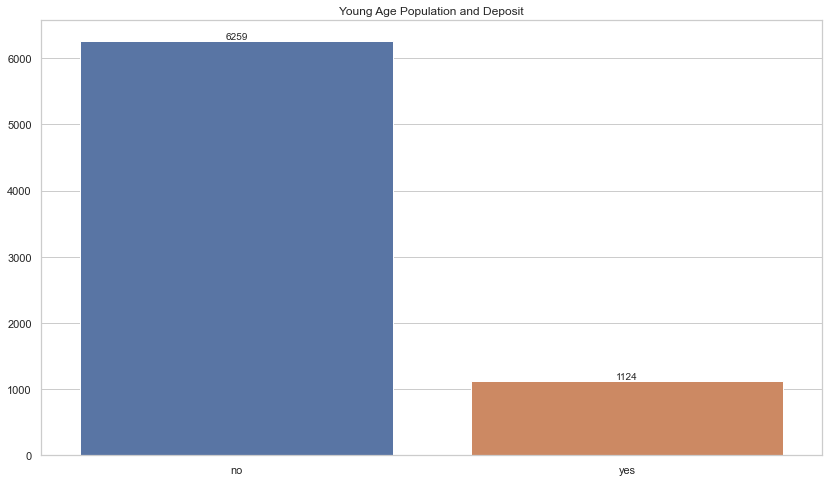

In [871]:
df_senior=data[(data['age'] <= 30)]['y']
plot_dist_sns(df_senior, "Young Age Population and Deposit")

**OBSERVATION:** Based on the above data it seems like people over 60 years old and younger people relative to their population groups at 83% & 17%, respectively are more likely to take a deposit than middle age people at 10%. With this information we can comfortably divide "age" into three categories.

In [872]:
# Let's use pandas.cut to create the aforementioned age groupings.
data['ages']=pd.cut(x=data['age'],bins=[17,30,60,99],labels=['young', 'middle', 'senior'])

/var/folders/j8/mnl825yn6qgbqyp60nlm3hd80000gn/T/ipykernel_56463/3568589683.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ages']=pd.cut(x=data['age'],bins=[17,30,60,99],labels=['young', 'middle', 'senior'])


In [873]:
data['ages'].value_counts()

middle    32892
young      7378
senior      910
Name: ages, dtype: int64

In [874]:
data.dtypes

age                  int64
job                 object
marital             object
education           object
default             object
housing             object
loan                object
contact             object
month               object
day_of_week         object
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome            object
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
y                   object
ages              category
dtype: object

In [875]:
# Let's get rid of the age column
data = data.drop('age', axis=1)

## Job Type

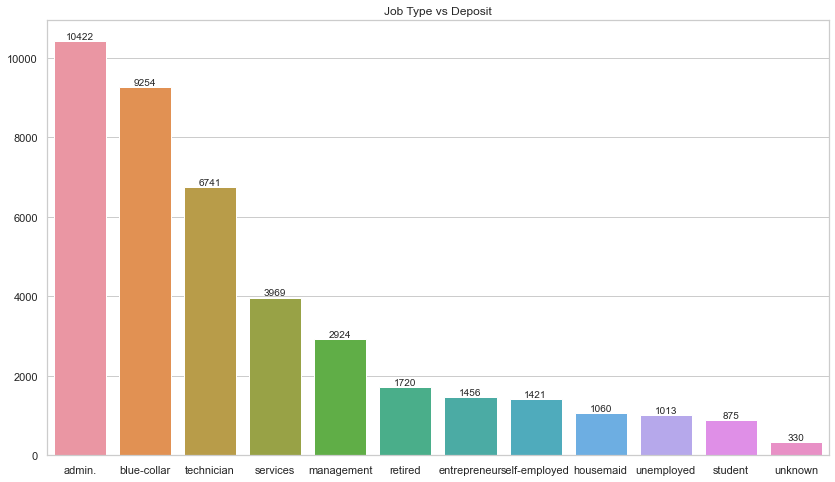

In [876]:
plot_dist_sns(data['job'], "Job Type vs Deposit")

**OBSERVATION:**  We will remove the observations with unknown values for this one.

In [877]:
data = data[data['job'] != 'unknown']

## Marital Status

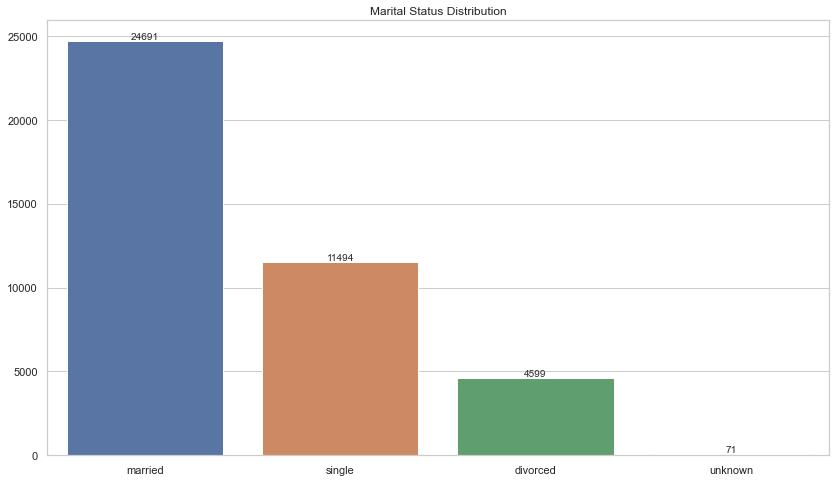

In [878]:
# Martial Status Distribution
plot_dist_sns(data['marital'],"Marital Status Distribution")

In [879]:
data = data[data['marital'] != 'unknown']

**OBSERVATION:** Unknown is not contributing much to the analysis and so is removed. 

In [880]:
pd.crosstab(data.marital, data.y, margins=True)

y,no,yes,All
marital,,,
divorced,4126,473,4599
married,22175,2516,24691
single,9889,1605,11494
All,36190,4594,40784


In [881]:
# Let's rename y to deposit on the data dataframe
data = data.rename(columns = {'y': 'deposit'})
data.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit,ages
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,middle
1,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,middle
2,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,middle
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,middle
4,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,middle


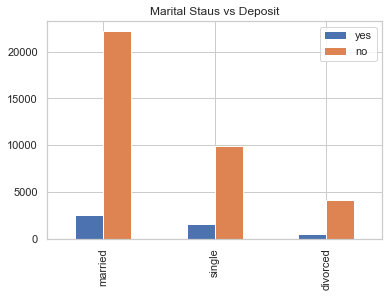

In [882]:
# Let's visualize how the deposit varies with marital status.
marital_vs_deposit_df = pd.DataFrame()
marital_vs_deposit_df['yes'] = data[data['deposit'] == 'yes']['marital'].value_counts()
marital_vs_deposit_df['no'] = data[data['deposit'] == 'no']['marital'].value_counts()
marital_vs_deposit_df.plot.bar(title="Marital Staus vs Deposit");

**OBSERVATION:** Married people are less likely to subscribe to a term deposit.

### Personal Loan

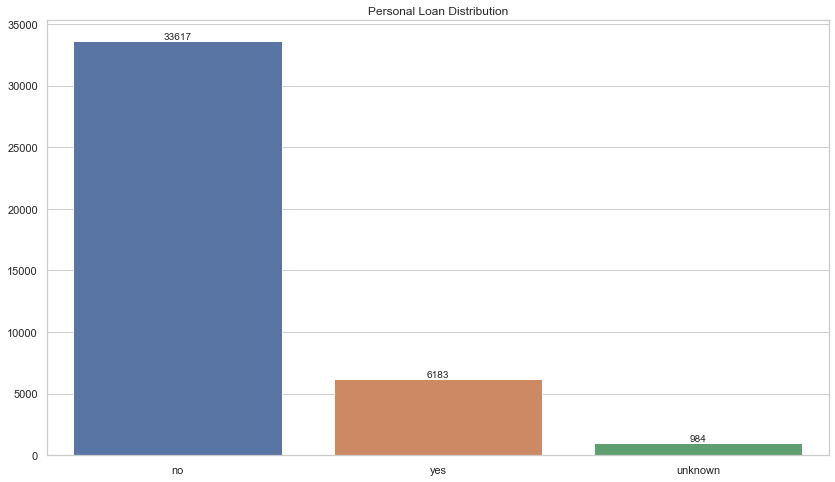

In [883]:
# How many clients have a personal loan?
plot_dist_sns(data['loan'],"Personal Loan Distribution")

In [884]:
# Is the the personal loan statistically significant? Can we remove it? Loo
loan_vs_deposit_df = pd.DataFrame()
loan_vs_deposit_df['yes'] = data[data['deposit'] == 'yes']['marital'].value_counts()
loan_vs_deposit_df['no'] = data[data['deposit'] == 'no']['marital'].value_counts()
calc_significance(loan_vs_deposit_df)

p value is 0.06164958816737563
Independent (H0 holds true)


**OBSERVATION:** There doesn't seem to be munch significance to y in these groups - leaning towards removing this column.

In [885]:
# Getting rid of loan feature.
data = data.drop('loan', axis=1)

In [886]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40784 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   job             40784 non-null  object  
 1   marital         40784 non-null  object  
 2   education       40784 non-null  object  
 3   default         40784 non-null  object  
 4   housing         40784 non-null  object  
 5   contact         40784 non-null  object  
 6   month           40784 non-null  object  
 7   day_of_week     40784 non-null  object  
 8   duration        40784 non-null  int64   
 9   campaign        40784 non-null  int64   
 10  pdays           40784 non-null  int64   
 11  previous        40784 non-null  int64   
 12  poutcome        40784 non-null  object  
 13  emp.var.rate    40784 non-null  float64 
 14  cons.price.idx  40784 non-null  float64 
 15  cons.conf.idx   40784 non-null  float64 
 16  euribor3m       40784 non-null  float64 
 17  nr.employed 

### Housing Loan

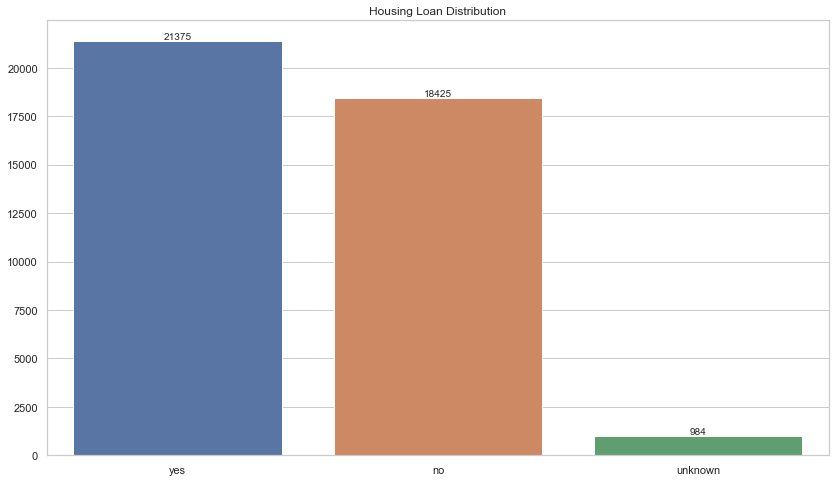

In [887]:
# What about housing loans?
plot_dist_sns(data['housing'],"Housing Loan Distribution")

In [888]:
pd.crosstab(data.housing, data.deposit, margins=True)

deposit,no,yes,All
housing,,,
no,16421,2004,18425
unknown,877,107,984
yes,18892,2483,21375
All,36190,4594,40784


<AxesSubplot:title={'center':'Job and Deposit'}>

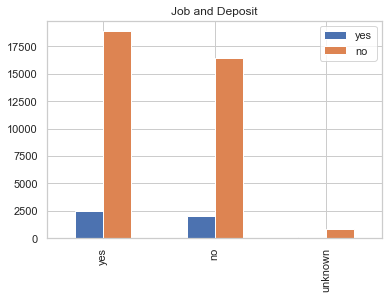

In [889]:
housing_deposit_df = pd.DataFrame()
housing_deposit_df['yes'] = data[data['deposit'] == 'yes']['housing'].value_counts()
housing_deposit_df['no'] = data[data['deposit'] == 'no']['housing'].value_counts()
housing_deposit_df.plot.bar(title='Job and Deposit')

In [890]:
# Let's calculate the statistical significance between deposit & housing loan.
calc_significance(calc_significance)

p value is 0.06164958816737563
Independent (H0 holds true)


**OBSERVATION:** Again this feature doesn't seem to add much in significance to the analysis. Will also remove.

In [891]:
data = data.drop('housing', axis=1)

### Contact Communication Type

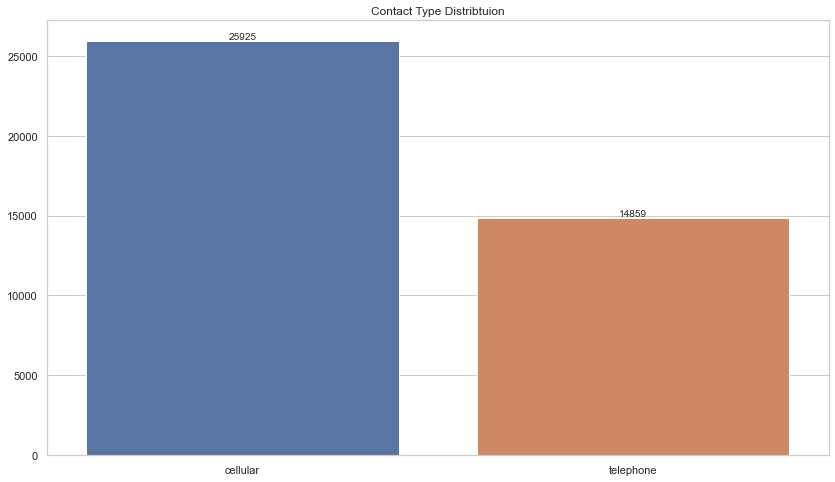

In [892]:
# How were these clients contacted?
plot_dist_sns(data['contact'],"Contact Type Distribtuion")

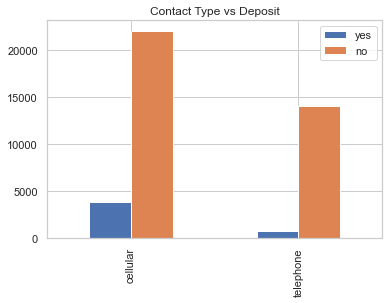

In [893]:
contacttype_deposit_df = pd.DataFrame()
contacttype_deposit_df['yes'] = data[data['deposit'] == 'yes']['contact'].value_counts()
contacttype_deposit_df['no'] = data[data['deposit'] == 'no']['contact'].value_counts()
contacttype_deposit_df.plot.bar(title='Contact Type vs Deposit');

**OBSERVATION:** It seems like cellular contacts may be more effective but we also have a higher amount of contacts being done via cell phone. Keeping this data.

### Education

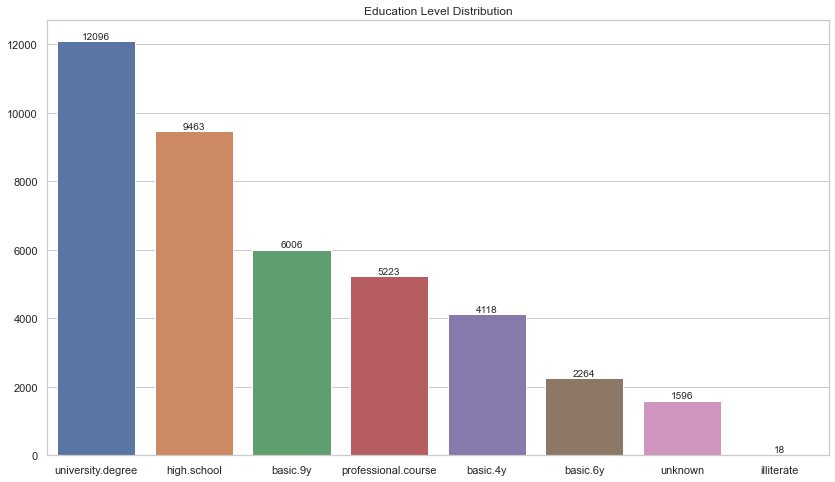

In [894]:
# What is the education level of the clients contacted?
plot_dist_sns(data['education'], "Education Level Distribution")

**OBSERVATION:** The illiterate category with only 18 observations will be removed.

In [895]:
# Removing "illiterate" entries
data = data[data['education'] != 'illiterate']

### Month (last contact month of year)

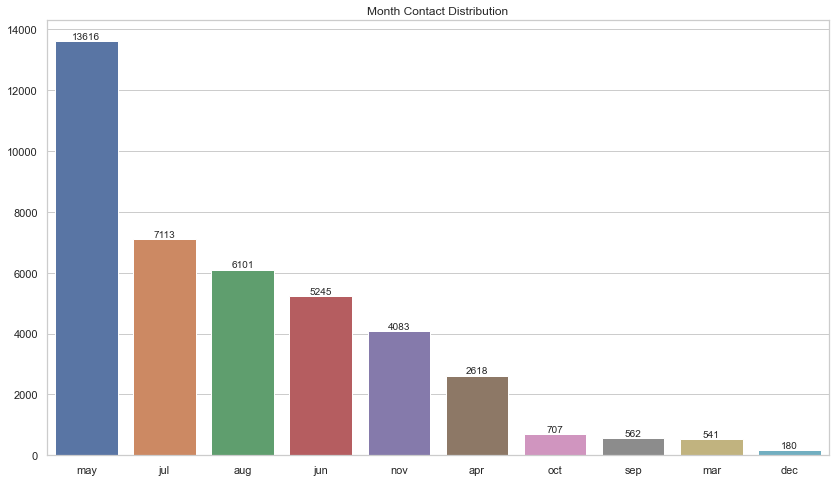

In [896]:
# What months have the higher number of contacts?
plot_dist_sns(data['month'],"Month Contact Distribution")

<AxesSubplot:title={'center':'Month vs Deposit'}>

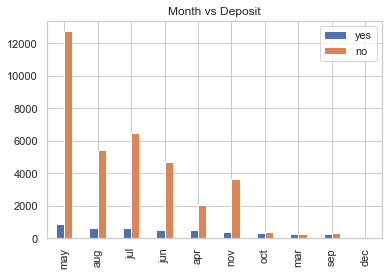

In [897]:
month_deposit_df = pd.DataFrame()
month_deposit_df['yes'] = data[data['deposit'] == 'yes']['month'].value_counts()
month_deposit_df['no'] = data[data['deposit'] == 'no']['month'].value_counts()
month_deposit_df.plot.bar(title='Month vs Deposit')

In [898]:
data[data['deposit'] == 'yes']['month'].value_counts()

may    882
aug    644
jul    642
jun    548
apr    536
nov    412
oct    311
mar    274
sep    253
dec     88
Name: month, dtype: int64

In [899]:
data[data['deposit'] == 'no']['month'].value_counts()

may    12734
jul     6471
aug     5457
jun     4697
nov     3671
apr     2082
oct      396
sep      309
mar      267
dec       92
Name: month, dtype: int64

**OBSERVATION**: Based on this dataset it seems like contacting in some months is more effective but so far it seems inconclusive which months are more fruitful since most contacts seem to happen with more frequency in May it makes sense that the volume of yes would be higher as well. Need todo more analysis to answer this - which months are more fruifult for the bank?

### pdays (# of days that passed by after a client was last contacted from a prev campaign)

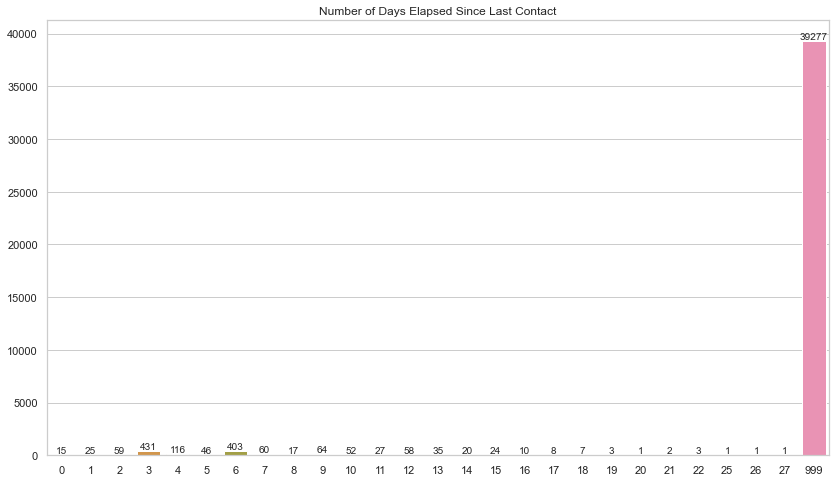

In [900]:
# How many days elapsed since the clients were contacted last? 
plot_dist_sns(data['pdays'],"Number of Days Elapsed Since Last Contact")

**OBSERVATION:** The majority (39673) were not contacted (999) since the last campaign. Does this affect the likelyhood of the client subscribing to a term deposit? My hunch is yes. Let's find out! 

Also, since most of the clients were not contacted before, it makes sense to change this variable to a binary one. The values would be 0 (no previous contact) and 1 (contacted in the past).

In [901]:
data['pdays_binary'] = np.where(data['pdays'] == 999, 0, 1)

In [902]:
# Delete the previous 
data = data.drop('pdays', axis=1)
data.tail()

,job,marital,education,default,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit,ages,pdays_binary
41183,retired,married,professional.course,no,cellular,nov,fri,334,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,senior,0
41184,blue-collar,married,professional.course,no,cellular,nov,fri,383,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,middle,0
41185,retired,married,university.degree,no,cellular,nov,fri,189,2,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,middle,0
41186,technician,married,professional.course,no,cellular,nov,fri,442,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,middle,0
41187,retired,married,professional.course,no,cellular,nov,fri,239,3,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no,senior,0


### Day of Week

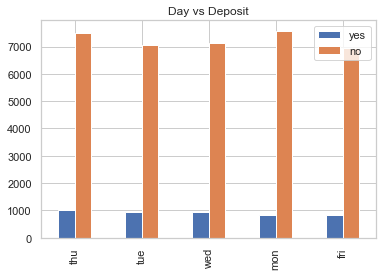

In [903]:
day_deposit_df = pd.DataFrame()
day_deposit_df['yes'] = data[data['deposit'] == 'yes']['day_of_week'].value_counts()
day_deposit_df['no'] = data[data['deposit'] == 'no']['day_of_week'].value_counts()
day_deposit_df.plot.bar(title='Day vs Deposit');

In [904]:
day_deposit_df.head()

,yes,no
thu,1031,7493
tue,945,7053
wed,934,7116
mon,841,7578
fri,839,6936


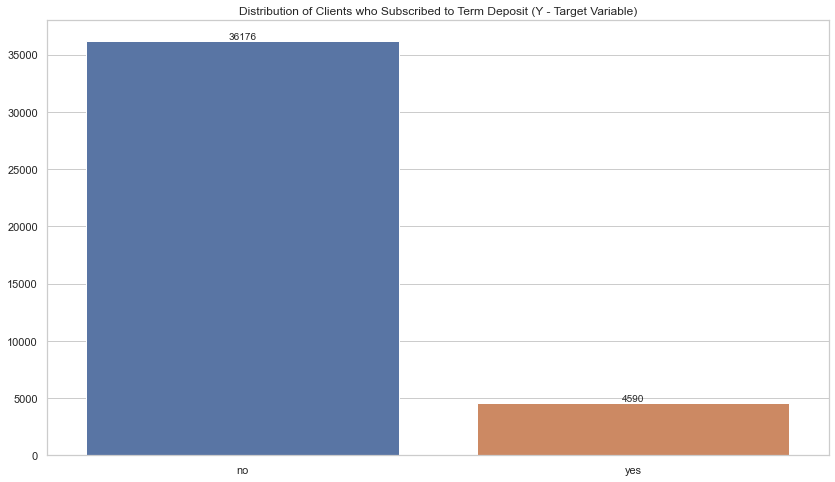

In [905]:
# What is the distribution of clients who have subscribed to a term deposit?
plot_dist_sns(data['deposit'], "Distribution of Clients who Subscribed to Term Deposit (Y - Target Variable)")

**OBSERVATION:** So the majority has not subscribed to a term deposit. Counts not very close, not certail we can use accuracy as a model. 

#### Let's visualize the distribution those counts (target variable) by other attributes.

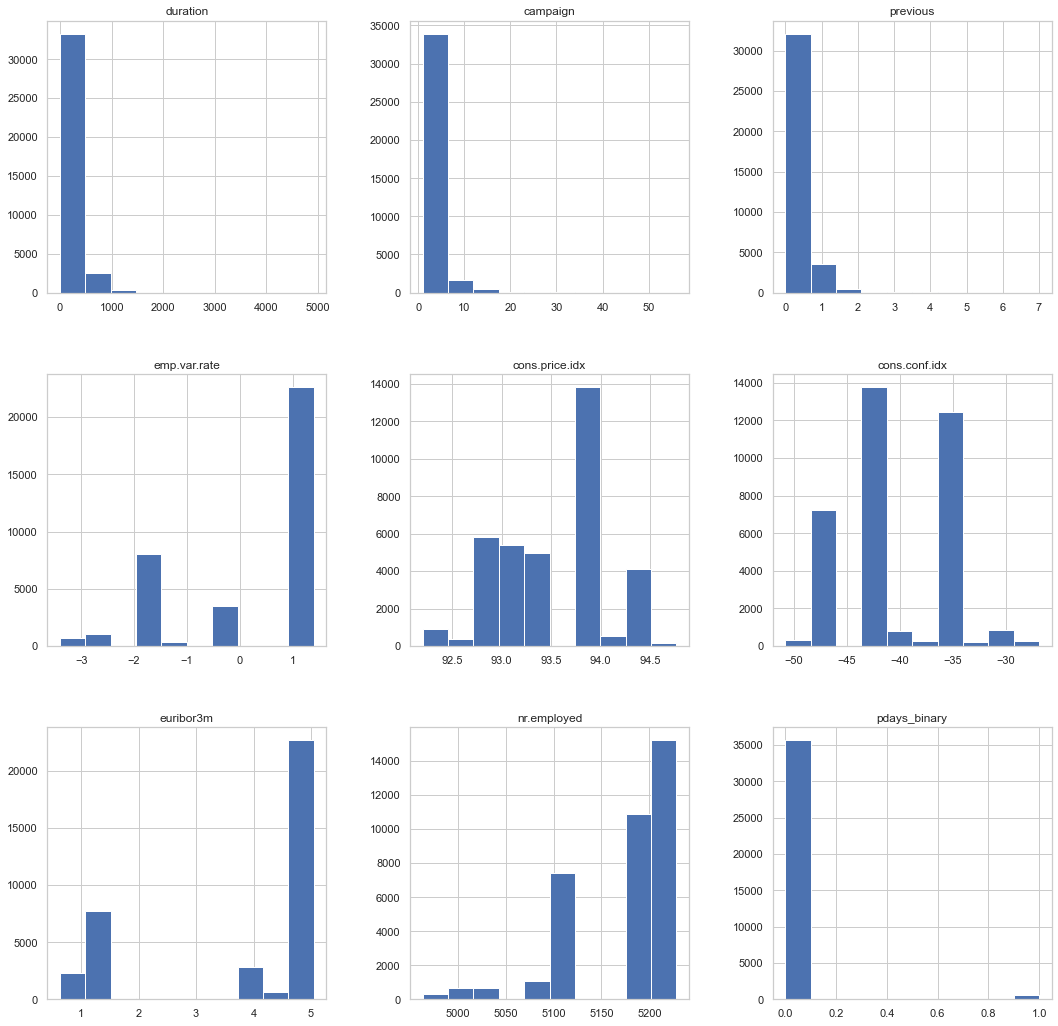

In [906]:
# What is the distrubution by other attributes of the clients who have not subscribed to a term deposit?
data[data['deposit'] == 'no'].hist(figsize=(18,18));

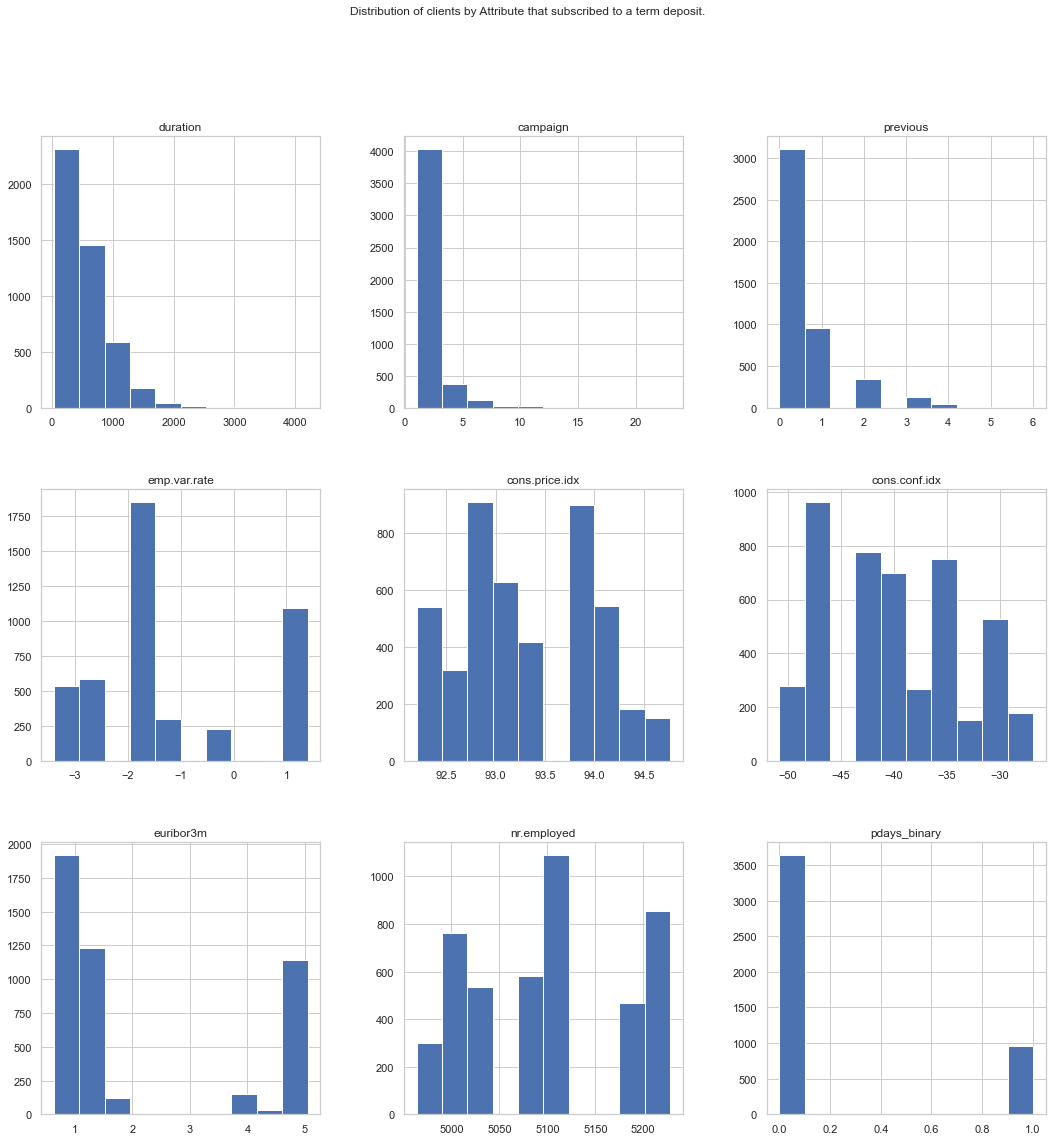

In [907]:
# What about the counts of those who did subscribe?
data[data['deposit'] == 'yes'].hist(figsize=(18,18));
plt.suptitle("Distribution of clients by Attribute that subscribed to a term deposit.");

### Previous

In [908]:
data['previous'].value_counts()

0    35199
1     4519
2      740
3      214
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

**OBSERVATION:** It makes sense to combine categories > 2 with 2; hence, anything above 2 will be labeled 2. This is with the logical understanding that clients that were contacted at least 2 times in the previous campaign, are very likely to subscribe to a term deposit in comparison to others (contacted zero or just once).

In [909]:
data.loc[data['previous'] >= 2, 'previous']=2

In [910]:
data['previous'].value_counts()

0    35199
1     4519
2     1048
Name: previous, dtype: int64

### Removing euribor3m

In [911]:
# As discovered with the heatmap of correlations (see initial sections above). We will delete euribor3m.
data = data.drop('euribor3m', axis=1)

### Removing duration

* Per the feature description:
duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

In [912]:
data = data.drop('duration', axis=1)

### Poutcome

In [913]:
data[data['deposit'] == 'no']['poutcome'].value_counts()

nonexistent    32088
failure         3624
success          464
Name: poutcome, dtype: int64

**OBSERVATION:** It's logically possible to deduce that success in the previous campaign indicates that these people are likely to buy a product once again.

## Information Value

After learning about information value, it may be useful to run it against our data to quickly check which variables we can expect to have the strongest impact on our target variable (i.e. deposit or Y). 

In [914]:
data._get_numeric_data().columns

Index(['campaign', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'nr.employed', 'pdays_binary'],
      dtype='object')

In [915]:
# Let's convert deposit to numerical and call it target.
data['target'] = data['deposit'].apply(lambda x : 1 if x == 'yes' else 0)  # Convert to numeric
data = data.drop('deposit',axis=1)

In [916]:
data._get_numeric_data().columns

Index(['campaign', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'nr.employed', 'pdays_binary', 'target'],
      dtype='object')

In [917]:
data.select_dtypes(include=['object']).columns.tolist()

['job',
 'marital',
 'education',
 'default',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [918]:
data.day_of_week.unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [919]:
data.columns.tolist()

['job',
 'marital',
 'education',
 'default',
 'contact',
 'month',
 'day_of_week',
 'campaign',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'nr.employed',
 'ages',
 'pdays_binary',
 'target']

In [920]:
# Let's calculate the info value for each of the columns
for c in data.columns.tolist():
    print(c)
    print(calc_iv(data,c,'target'))
    print('----')

job
0.19066998471190716
----
marital
0.027285982313870305
----
education
0.0474271014878878
----
default
0.1257912351968154
----
contact
0.25197437196552985
----
month
0.48468953506905266
----
day_of_week
0.006184971156376488
----
campaign
0.05648929221580541
----
previous
0.3428492282592761
----
poutcome
0.5508788968913186
----
emp.var.rate
1.06689981639572
----
cons.price.idx
1.3124704263771632
----
cons.conf.idx
1.3124704263771632
----
nr.employed
1.1985974794953729
----
ages
0.19325228546170803
----
pdays_binary
0.5549826156895252
----
target
0.0
----


**OBSERVATION:** All features show strong predictive power with the expection of target (y) for obvious reasons but also day_of_week at a
0.006184971156376488 show very weak predictive power. Per the definition of IV features with IV lower than 0.02 have no predictive power at all and so we will discard this variable.

In [921]:
data = data.drop('day_of_week', axis=1)

### Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

The business objective can be broken down into two areas:
* **Customer segmentation**. For example, who subscribed to the term deposit. This facilitates the categorization of those customers who are likely to pay for a given service. This enables the banks to design targetted campains for these customer groups.
* **Prediction of marketing campaing results per customer**. This gives insight into what factors affect the campaing results and as a result assists in the discovery of methods to make the marketing campaings more effective and ideally reducing the amount of contacts to do.

The primary goal (per the target variable) is to build a model that will predict the outcome of the Bank's campaign by assessing if the client will subscribe to a term deposit.

### Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

We have already made some modifications to the data: removed some unknown variables, dropped columns that didn't have strong predictive value (low IV score or were irrelevant) and converted age to categorical and we turned yes/no features to binary data. 

We still have some object data and we'll have to make some decisions:
* Categorical columns will be converted into numerical values via label encoding, hot encoding or just numeric transformation.


In [951]:
for f in data.select_dtypes(include=['object','category']).columns.tolist():
    print(f'Feature: {f}')
    print(data[f].unique())

Feature: job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'entrepreneur' 'student']
Feature: marital
['married' 'single' 'divorced']
Feature: education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree']
Feature: default
['no' 'unknown']
Feature: contact
['telephone' 'cellular']
Feature: month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Feature: poutcome
['nonexistent' 'failure' 'success']
Feature: ages
['middle', 'young', 'senior']
Categories (3, object): ['young' < 'middle' < 'senior']


**OBSERVATION:** Looking at unknown it really doesn't seem to provide much differentiation with no and unknown. Making the decision to drop it.

In [952]:
data = data.drop('default', axis=1)

In [955]:
data.select_dtypes(include=['object','category']).columns.tolist()

['job', 'marital', 'education', 'contact', 'month', 'poutcome', 'ages']

In [958]:
for f in data.select_dtypes(include=['object','category']).columns.tolist():
    print(f'Feature: {f}')
    print(data[f].unique())

Feature: job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'entrepreneur' 'student']
Feature: marital
['married' 'single' 'divorced']
Feature: education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree']
Feature: contact
['telephone' 'cellular']
Feature: month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Feature: poutcome
['nonexistent' 'failure' 'success']
Feature: ages
['middle', 'young', 'senior']
Categories (3, object): ['young' < 'middle' < 'senior']


#### Label Encoding for age column.

In [959]:
# Since the 'ages' column is a "category" will use this to convert it to category codes and storing them as "age".
# This technique is known as "label encoding".
data["age"] = data["ages"].cat.codes
data.head()

,job,marital,education,contact,month,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,ages,pdays_binary,target,age
0,housemaid,married,basic.4y,telephone,may,1,0,nonexistent,1.1,93.994,-36.4,5191.0,middle,0,0,1
1,services,married,high.school,telephone,may,1,0,nonexistent,1.1,93.994,-36.4,5191.0,middle,0,0,1
2,services,married,high.school,telephone,may,1,0,nonexistent,1.1,93.994,-36.4,5191.0,middle,0,0,1
3,admin.,married,basic.6y,telephone,may,1,0,nonexistent,1.1,93.994,-36.4,5191.0,middle,0,0,1
4,services,married,high.school,telephone,may,1,0,nonexistent,1.1,93.994,-36.4,5191.0,middle,0,0,1


In [960]:
# And drop the old "ages" category column
data = data.drop("ages", axis=1)

#### Numeric transformation of month column.

In [967]:
# Month will be converted to numeric.
month = data['month'].unique()
month_num = [i for i in range(1,13)]

# Create dictionary of month name and it's numeric equivalent.
months = dict(zip(month, month_num))

#  Now, convert the month column to numeric value in the dataframe
data['month'] = data['month'].map(months)
data.head()

,job,marital,education,contact,month,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,pdays_binary,target,age
0,housemaid,married,basic.4y,telephone,1,1,0,nonexistent,1.1,93.994,-36.4,5191.0,0,0,1
1,services,married,high.school,telephone,1,1,0,nonexistent,1.1,93.994,-36.4,5191.0,0,0,1
2,services,married,high.school,telephone,1,1,0,nonexistent,1.1,93.994,-36.4,5191.0,0,0,1
3,admin.,married,basic.6y,telephone,1,1,0,nonexistent,1.1,93.994,-36.4,5191.0,0,0,1
4,services,married,high.school,telephone,1,1,0,nonexistent,1.1,93.994,-36.4,5191.0,0,0,1


#### One hot encoding for contact, education, job, marital & poutcome.

In [972]:
# contact hot encoding
# Create the dummies
contact_dummies = pd.get_dummies(data['contact'], prefix='contact')
contact_dummies.head()

,contact_cellular,contact_telephone
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [973]:
# Concatenate dummies to datafram
data = pd.concat([data, contact_dummies], axis=1)
data.head()

,job,marital,education,contact,month,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,pdays_binary,target,age,poutcome_failure,poutcome_nonexistent,poutcome_success,contact_cellular,contact_telephone
0,housemaid,married,basic.4y,telephone,1,1,0,nonexistent,1.1,93.994,-36.4,5191.0,0,0,1,0,1,0,0,1
1,services,married,high.school,telephone,1,1,0,nonexistent,1.1,93.994,-36.4,5191.0,0,0,1,0,1,0,0,1
2,services,married,high.school,telephone,1,1,0,nonexistent,1.1,93.994,-36.4,5191.0,0,0,1,0,1,0,0,1
3,admin.,married,basic.6y,telephone,1,1,0,nonexistent,1.1,93.994,-36.4,5191.0,0,0,1,0,1,0,0,1
4,services,married,high.school,telephone,1,1,0,nonexistent,1.1,93.994,-36.4,5191.0,0,0,1,0,1,0,0,1


In [974]:
# education hot econding
education_dummies = pd.get_dummies(data['education'], prefix='education')
education_dummies.head()

,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_professional.course,education_university.degree,education_unknown
0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0


In [976]:
# making the decision to drop unknown
education_dummies.drop('education_unknown', axis=1, inplace=True)
education_dummies.tail()

,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_professional.course,education_university.degree
41183,0,0,0,0,1,0
41184,0,0,0,0,1,0
41185,0,0,0,0,0,1
41186,0,0,0,0,1,0
41187,0,0,0,0,1,0


In [977]:
data = pd.concat([data, education_dummies], axis=1)
data.head()

,job,marital,education,contact,month,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,pdays_binary,target,age,poutcome_failure,poutcome_nonexistent,poutcome_success,contact_cellular,contact_telephone,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_professional.course,education_university.degree
0,housemaid,married,basic.4y,telephone,1,1,0,nonexistent,1.1,93.994,-36.4,5191.0,0,0,1,0,1,0,0,1,1,0,0,0,0,0
1,services,married,high.school,telephone,1,1,0,nonexistent,1.1,93.994,-36.4,5191.0,0,0,1,0,1,0,0,1,0,0,0,1,0,0
2,services,married,high.school,telephone,1,1,0,nonexistent,1.1,93.994,-36.4,5191.0,0,0,1,0,1,0,0,1,0,0,0,1,0,0
3,admin.,married,basic.6y,telephone,1,1,0,nonexistent,1.1,93.994,-36.4,5191.0,0,0,1,0,1,0,0,1,0,1,0,0,0,0
4,services,married,high.school,telephone,1,1,0,nonexistent,1.1,93.994,-36.4,5191.0,0,0,1,0,1,0,0,1,0,0,0,1,0,0


In [979]:
# job hot encoding
job_dummies = pd.get_dummies(data['job'], prefix='job')
job_dummies.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0


In [980]:
# concatenate job_dummies into the main dataframe
data = pd.concat([data, job_dummies], axis=1)
data.tail()

,job,marital,education,contact,month,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,pdays_binary,target,age,poutcome_failure,poutcome_nonexistent,poutcome_success,contact_cellular,contact_telephone,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_professional.course,education_university.degree,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
41183,retired,married,professional.course,cellular,6,1,0,nonexistent,-1.1,94.767,-50.8,4963.6,0,1,2,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
41184,blue-collar,married,professional.course,cellular,6,1,0,nonexistent,-1.1,94.767,-50.8,4963.6,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
41185,retired,married,university.degree,cellular,6,2,0,nonexistent,-1.1,94.767,-50.8,4963.6,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
41186,technician,married,professional.course,cellular,6,1,0,nonexistent,-1.1,94.767,-50.8,4963.6,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
41187,retired,married,professional.course,cellular,6,3,1,failure,-1.1,94.767,-50.8,4963.6,0,0,2,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [981]:
# marital hot encoding
marital_dummies = pd.get_dummies(data['marital'], prefix='marital')
marital_dummies.head()

,marital_divorced,marital_married,marital_single
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [986]:
# merge martial column with marital_dummies to make some observations.
pd.concat([data['marital'], marital_dummies], axis=1).head(n=20)

,marital,marital_divorced,marital_married,marital_single
0,married,0,1,0
1,married,0,1,0
2,married,0,1,0
3,married,0,1,0
4,married,0,1,0
5,married,0,1,0
6,married,0,1,0
7,married,0,1,0
8,single,0,0,1
9,single,0,0,1


In [ ]:
## Making the decision to drop marital_divorced.
marital_dummies.drop('marital_divorced', axis=1, inplace=True)

In [990]:
# Concatenate marital_dummies into the main dataframe
data = pd.concat([data, marital_dummies], axis=1)
data.head()

,job,marital,education,contact,month,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,pdays_binary,target,age,poutcome_failure,poutcome_nonexistent,poutcome_success,contact_cellular,contact_telephone,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_professional.course,education_university.degree,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single
0,housemaid,married,basic.4y,telephone,1,1,0,nonexistent,1.1,93.994,-36.4,5191.0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,services,married,high.school,telephone,1,1,0,nonexistent,1.1,93.994,-36.4,5191.0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,services,married,high.school,telephone,1,1,0,nonexistent,1.1,93.994,-36.4,5191.0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,admin.,married,basic.6y,telephone,1,1,0,nonexistent,1.1,93.994,-36.4,5191.0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,services,married,high.school,telephone,1,1,0,nonexistent,1.1,93.994,-36.4,5191.0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [969]:
# poutcome hot encoding
# Create the dummies.
poutcome_dummies = pd.get_dummies(data['poutcome'], prefix='poutcome')
poutcome_dummies.head()

,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [971]:
# Concatenate to dataframe
data = pd.concat([data, poutcome_dummies], axis=1)
data.head()

,job,marital,education,contact,month,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,pdays_binary,target,age,poutcome_failure,poutcome_nonexistent,poutcome_success
0,housemaid,married,basic.4y,telephone,1,1,0,nonexistent,1.1,93.994,-36.4,5191.0,0,0,1,0,1,0
1,services,married,high.school,telephone,1,1,0,nonexistent,1.1,93.994,-36.4,5191.0,0,0,1,0,1,0
2,services,married,high.school,telephone,1,1,0,nonexistent,1.1,93.994,-36.4,5191.0,0,0,1,0,1,0
3,admin.,married,basic.6y,telephone,1,1,0,nonexistent,1.1,93.994,-36.4,5191.0,0,0,1,0,1,0
4,services,married,high.school,telephone,1,1,0,nonexistent,1.1,93.994,-36.4,5191.0,0,0,1,0,1,0


In [995]:
# Let's drop the categoridal columns left.
data.select_dtypes(include=['object','category']).columns.tolist()

['job', 'marital', 'education', 'contact', 'poutcome']

In [996]:
data.drop(['job', 'marital', 'education', 'contact', 'poutcome'], axis=1, inplace=True)
data.select_dtypes(include=['object','category']).columns.tolist()

[]

In [997]:
# Check that all features are of a numeric type.
data.dtypes

month                              int64
campaign                           int64
previous                           int64
emp.var.rate                     float64
cons.price.idx                   float64
cons.conf.idx                    float64
nr.employed                      float64
pdays_binary                       int64
target                             int64
age                                 int8
poutcome_failure                   uint8
poutcome_nonexistent               uint8
poutcome_success                   uint8
contact_cellular                   uint8
contact_telephone                  uint8
education_basic.4y                 uint8
education_basic.6y                 uint8
education_basic.9y                 uint8
education_high.school              uint8
education_professional.course      uint8
education_university.degree        uint8
job_admin.                         uint8
job_blue-collar                    uint8
job_entrepreneur                   uint8
job_housemaid   

### Train/Test Split

With your data prepared, split it into a train and test set.

In [998]:
# The train_test_split method was called with the stratify argument to ensure that both the train and test sets would 
# have a similar proportion of classes. We'll split in proportion 70:30.
X_train, X_test, y_train, y_test = train_test_split(data.drop('target', axis = 1), data.target, 
                                                    random_state = 42,
                                                    test_size = 0.3)

In [999]:
# Check the shape for each data set.
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(28536, 33) (12230, 33) (28536,) (12230,)


### A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

#### DummyRegressor

In [1001]:
from sklearn.dummy import DummyRegressor

In [1005]:
# Create the Regressor
baseline_model = DummyRegressor(strategy='mean')

In [1006]:
# Fit the model on the training dataset
baseline_model.fit(X_train, y_train)
# Use test dataset to make predictions
y_pred = baseline_model.predict(X_test)

In [1007]:
# Calculate the root mean squared error
baseline_mse = mean_squared_error(y_test, y_pred)
baseline_rmse = np.sqrt(baseline_mse)

print(f'{baseline_rmse}')

0.31368545562723305


### A Simple Model

Use Logistic Regression to build a basic model on your data.  

#### LogisticRegression Model

In [1008]:
# Create a LinearRegression model
logreg_model = LogisticRegression(random_state=42, max_iter=500)

In [1010]:
# Fit the model
logreg_model.fit(X_train, y_train)
# Use test dataset to make a prediction
y_pred = logreg_model.predict(X_test)

In [1011]:
# Predicted vs Actual value
print("Predicted: {}\n Actual:{}".format(y_pred[:10],y_test[:10]))

Predicted: [0 0 0 1 0 0 0 0 0 0]
 Actual:30186    1
12789    0
5925     0
37358    0
5450     0
15269    1
2336     0
14152    0
29677    0
11079    0
Name: target, dtype: int64


### Score the Model

What is the accuracy of your model?

In [1013]:
lgr_accuracy = accuracy_score(y_pred = y_pred, y_true=y_test)
print(f'Accuracy of the model LogisticRegression: {lgr_accuracy * 100:.2f}%')

Accuracy of the model LogisticRegression: 90.16%


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

##### Questions